In [1]:
! pip install autoviz

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree, ensemble
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from IPython.display import clear_output

In [3]:
orig_inputs = np.load ("./initial_inputs.npy")
orig_outputs = np.load ("./initial_outputs.npy")

In [4]:
orig_inputs

array([[0.31940389, 0.76295937],
       [0.57432921, 0.8798981 ],
       [0.73102363, 0.73299988],
       [0.84035342, 0.26473161],
       [0.65011406, 0.68152635],
       [0.41043714, 0.1475543 ],
       [0.31269116, 0.07872278],
       [0.68341817, 0.86105746],
       [0.08250725, 0.40348751],
       [0.88388983, 0.58225397]])

In [5]:
orig_outputs

array([ 1.32267704e-079,  1.03307824e-046,  7.71087511e-016,
        3.34177101e-124, -3.60606264e-003, -2.15924904e-054,
       -2.08909327e-091,  2.53500115e-040,  3.60677119e-081,
        6.22985647e-048])

In [11]:
len(orig_outputs)

10

In [11]:
# Add the new data points
#new_data = np.array([0.743553, 0.12131])
#inputs = np.vstack([orig_inputs, new_data])
inputs = orig_inputs
outputs = orig_outputs

len(orig_inputs), len(inputs)

(10, 10)

In [13]:
inputs

array([[0.31940389, 0.76295937],
       [0.57432921, 0.8798981 ],
       [0.73102363, 0.73299988],
       [0.84035342, 0.26473161],
       [0.65011406, 0.68152635],
       [0.41043714, 0.1475543 ],
       [0.31269116, 0.07872278],
       [0.68341817, 0.86105746],
       [0.08250725, 0.40348751],
       [0.88388983, 0.58225397]])

In [15]:
len(orig_inputs), len(inputs)

(10, 10)

In [17]:
inputs

array([[0.31940389, 0.76295937],
       [0.57432921, 0.8798981 ],
       [0.73102363, 0.73299988],
       [0.84035342, 0.26473161],
       [0.65011406, 0.68152635],
       [0.41043714, 0.1475543 ],
       [0.31269116, 0.07872278],
       [0.68341817, 0.86105746],
       [0.08250725, 0.40348751],
       [0.88388983, 0.58225397]])

In [21]:
#outputs = np.append(orig_outputs, 1.6446384844289582e-135)

In [19]:
len(outputs)

10

In [21]:
outputs

array([ 1.32267704e-079,  1.03307824e-046,  7.71087511e-016,
        3.34177101e-124, -3.60606264e-003, -2.15924904e-054,
       -2.08909327e-091,  2.53500115e-040,  3.60677119e-081,
        6.22985647e-048])

In [23]:
data = {'feature1': inputs[:,0],
        'feature2': inputs[:,1],
        'target': outputs
       }

df = pd.DataFrame(data)
df

,feature1,feature2,target
0,0.319404,0.762959,1.322677e-79
1,0.574329,0.879898,1.033078e-46
2,0.731024,0.733000,7.710875e-16
3,0.840353,0.264732,3.341771e-124
4,0.650114,0.681526,-3.606063e-03
5,0.410437,0.147554,-2.159249e-54
6,0.312691,0.078723,-2.089093e-91
7,0.683418,0.861057,2.535001e-40
8,0.082507,0.403488,3.606771e-81
9,0.883890,0.582254,6.229856e-48


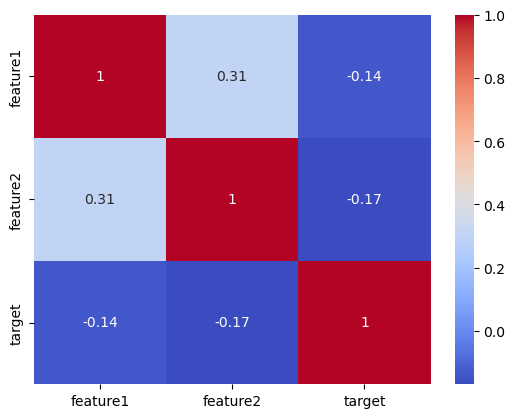

In [25]:
# Display correlation to Output Outcome
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import seaborn as sns
numerical_df = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  10 non-null     float64
 1   feature2  10 non-null     float64
 2   target    10 non-null     float64
dtypes: float64(3)
memory usage: 372.0 bytes


In [29]:
df.describe()

,feature1,feature2,target
count,10.000000,10.000000,1.000000e+01
mean,0.548817,0.539519,-3.606063e-04
std,0.259160,0.296007,1.140337e-03
min,0.082507,0.078723,-3.606063e-03
25%,0.342162,0.299421,-1.566820e-91
50%,0.612222,0.631890,6.793724e-80
75%,0.719122,0.755469,7.903833e-47
max,0.883890,0.879898,7.710875e-16


In [31]:
df.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.97, 0.99])

,feature1,feature2,target
count,10.000000,10.000000,1.000000e+01
mean,0.548817,0.539519,-3.606063e-04
std,0.259160,0.296007,1.140337e-03
min,0.082507,0.078723,-3.606063e-03
10%,0.289673,0.140671,-3.606063e-04
25%,0.342162,0.299421,-1.566820e-91
50%,0.612222,0.631890,6.793724e-80
75%,0.719122,0.755469,7.903833e-47
90%,0.844707,0.862942,7.710875e-17
95%,0.864298,0.871420,4.240981e-16


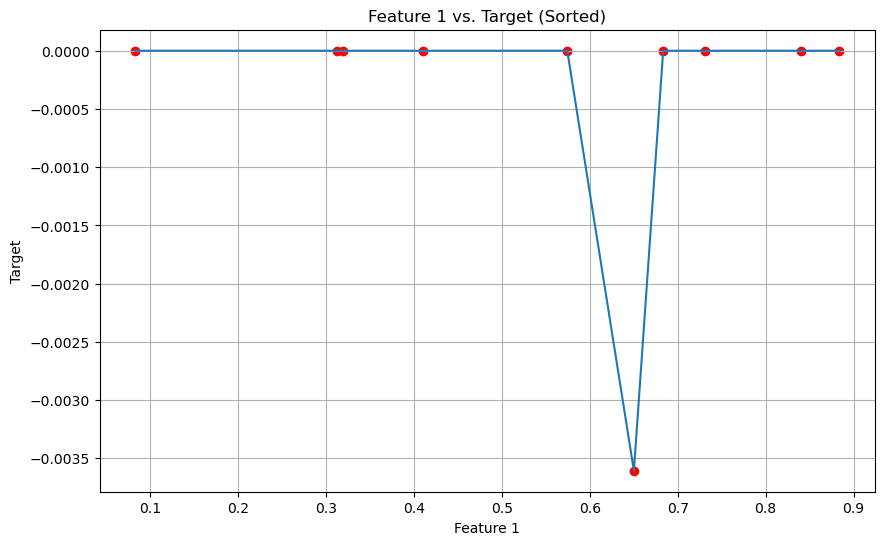

In [33]:
import matplotlib.pyplot as plt

# Sort the DataFrame by 'feature1'
df_sorted = df.sort_values('feature1')

# Plot 'feature1' against 'target' with connected points
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature1'], df_sorted['target'], linestyle='-')
plt.scatter(df_sorted['feature1'], df_sorted['target'], color='red', label='Samples')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.title('Feature 1 vs. Target (Sorted)')
plt.grid(True)
plt.show()

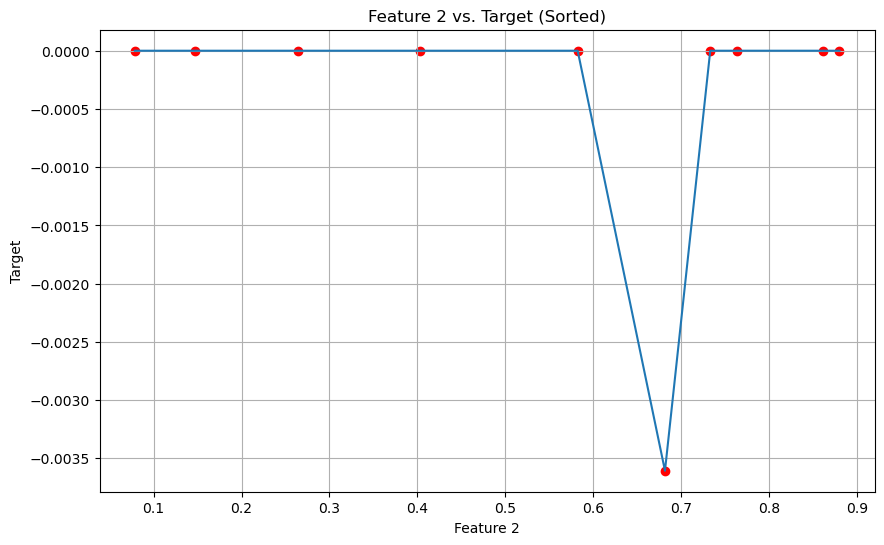

In [35]:
# Sort the DataFrame by 'feature2'
df_sorted = df.sort_values('feature2')

# Plot 'feature2' against 'target' with connected points
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature2'], df_sorted['target'], linestyle='-')
plt.scatter(df_sorted['feature2'], df_sorted['target'], color='red', label='Samples')
plt.xlabel('Feature 2')
plt.ylabel('Target')
plt.title('Feature 2 vs. Target (Sorted)')
plt.grid(True)
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


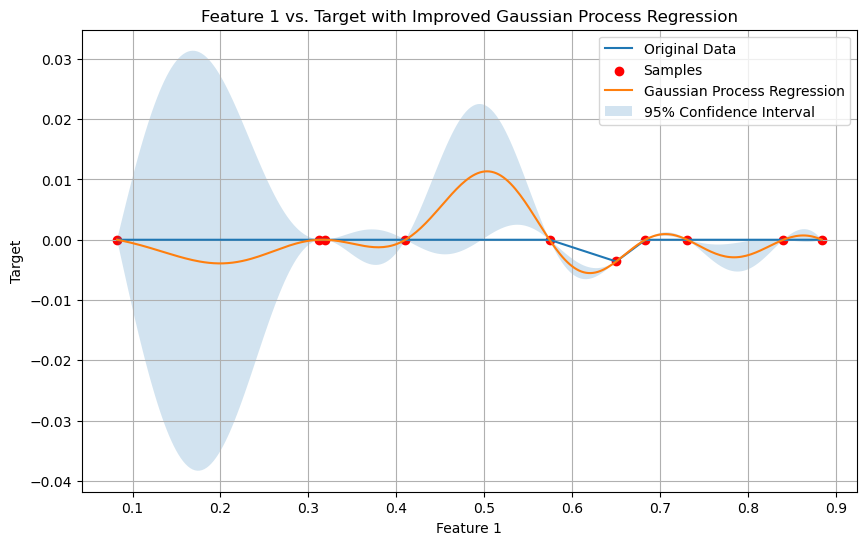

0.0316**2 * RBF(length_scale=0.0924)

In [37]:
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Assuming df is already defined as in your provided code and contains 'feature1' and 'target' columns

# Sort the DataFrame by 'feature1'
df_sorted = df.sort_values('feature1')

# Prepare the data for the Gaussian Process Regressor
X = df_sorted[['feature1']].values
y = df_sorted['target'].values

# Define a more flexible kernel
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2)) # Increased length_scale

# Create and fit the Gaussian Process Regressor with the improved kernel
gpr = GaussianProcessRegressor(kernel=kernel, alpha=1e-10, n_restarts_optimizer=10, random_state=0)
gpr.fit(X, y)

# Predict target values and their standard deviations
X_pred = np.linspace(X.min(), X.max(), 300).reshape(-1, 1) # Increased prediction points for smoother curve
y_pred, sigma = gpr.predict(X_pred, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature1'], df_sorted['target'], linestyle='-', label='Original Data')
plt.scatter(df_sorted['feature1'], df_sorted['target'], color='red', label='Samples')
plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.title('Feature 1 vs. Target with Improved Gaussian Process Regression')
plt.legend()
plt.grid(True)
plt.show()

gpr.kernel_

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


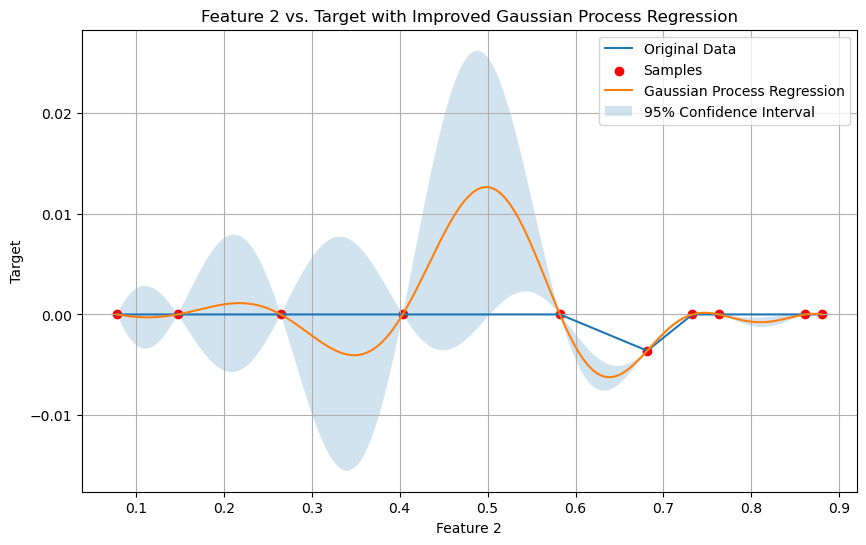

0.0316**2 * RBF(length_scale=0.107)

In [39]:
# Assuming df is already defined as in your provided code

# Sort the DataFrame by 'feature2'
df_sorted = df.sort_values('feature2')
# Prepare the data for the Gaussian Process Regressor
X = df_sorted[['feature2']].values  # Use only 'feature2' as input
y = df_sorted['target'].values

# Define a more flexible kernel for feature2
kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=0.1, length_scale_bounds=(1e-2, 1e2)) # Adjust length_scale

# Create and fit the Gaussian Process Regressor with the improved kernel
gpr = GaussianProcessRegressor(kernel=kernel, alpha=1e-10, n_restarts_optimizer=10, random_state=0)
gpr.fit(X, y)

# Predict target values and their standard deviations
X_pred = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)  # Generate points for prediction
y_pred, sigma = gpr.predict(X_pred, return_std=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['feature2'], df_sorted['target'], linestyle='-', label='Original Data')
plt.scatter(df_sorted['feature2'], df_sorted['target'], color='red', label='Samples')
plt.plot(X_pred, y_pred, label='Gaussian Process Regression')
plt.fill_between(X_pred.flatten(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Feature 2')
plt.ylabel('Target')
plt.title('Feature 2 vs. Target with Improved Gaussian Process Regression')
plt.legend()
plt.grid(True)
plt.show()

gpr.kernel_

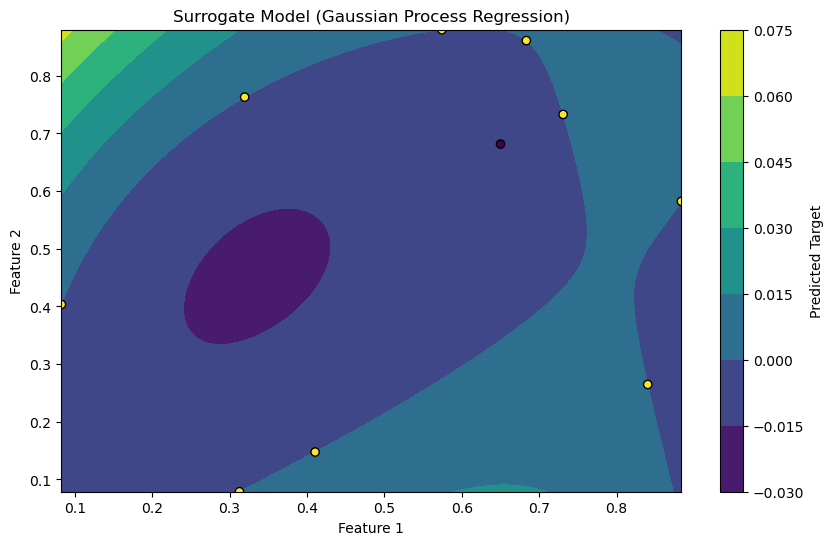

In [41]:
# Assuming 'inputs' and 'outputs' are defined as in the provided code.



# Create the Gaussian Process Regressor
kernel = RBF(length_scale=1.0)  # You can adjust the length_scale parameter
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

# Fit the GPR model to the data
gpr.fit(inputs, outputs)

# Create a grid of points for prediction
x1_grid = np.linspace(min(inputs[:, 0]), max(inputs[:, 0]), 100)
x2_grid = np.linspace(min(inputs[:, 1]), max(inputs[:, 1]), 100)
x1_grid, x2_grid = np.meshgrid(x1_grid, x2_grid)
grid_points = np.column_stack([x1_grid.flatten(), x2_grid.flatten()])


# Predict the target values and standard deviations at the grid points
y_pred, sigma = gpr.predict(grid_points, return_std=True)

# Reshape predictions for plotting
y_pred = y_pred.reshape(x1_grid.shape)
sigma = sigma.reshape(x1_grid.shape)

# Create the plot
plt.figure(figsize=(10, 6))
contour = plt.contourf(x1_grid, x2_grid, y_pred, cmap='viridis')
plt.colorbar(contour, label='Predicted Target')

# Plot the original data points
plt.scatter(inputs[:, 0], inputs[:, 1], c=outputs, cmap='viridis', edgecolor='k', label='Samples')

# Add a title and labels
plt.title('Surrogate Model (Gaussian Process Regression)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Show the plot
plt.show()

In [43]:
import numpy as np
from scipy.stats import norm

def expected_improvement(X, gpr, xi=0.01):
    mu, sigma = gpr.predict(X, return_std=True)
    mu_sample_opt = np.max(gpr.y_train_)
    with np.errstate(divide='ignore'):
        Z = (mu - mu_sample_opt - xi) / sigma
        ei = (mu - mu_sample_opt - xi) * norm.cdf(Z) + sigma * norm.pdf(Z)
        ei[sigma == 0.0] = 0.0
    return ei

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


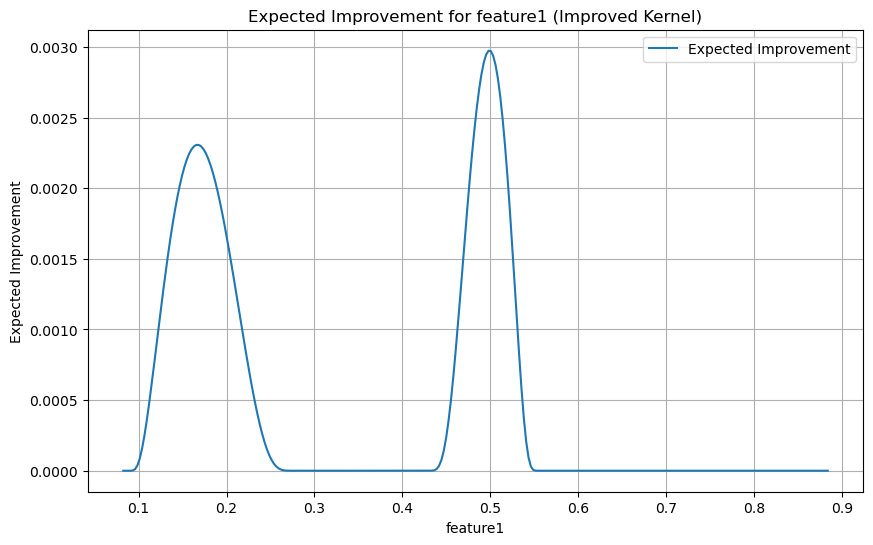

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


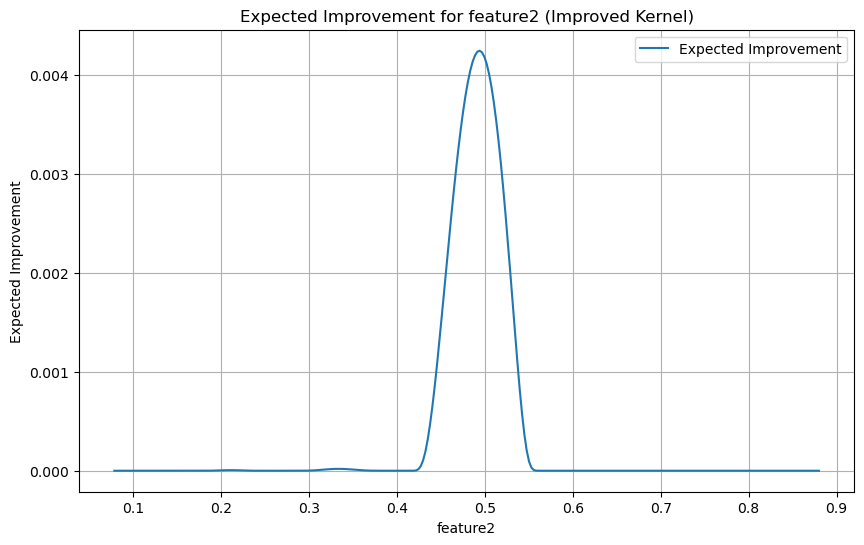

In [45]:
# Calculate and plot expected improvement for each feature
from scipy.stats import norm
from sklearn.gaussian_process.kernels import ConstantKernel as C

def expected_improvement(X, gpr, xi=0.01):
    mu, sigma = gpr.predict(X, return_std=True)
    mu_sample_opt = np.max(gpr.y_train_)
    with np.errstate(divide='ignore'):
        Z = (mu - mu_sample_opt - xi) / sigma
        ei = (mu - mu_sample_opt - xi) * norm.cdf(Z) + sigma * norm.pdf(Z)
        ei[sigma == 0.0] = 0.0
    return ei

# Calculate and plot expected improvement for each feature

for feature_name in ['feature1', 'feature2']:
    # Prepare the data for the Gaussian Process Regressor
    X = df[[feature_name]].values
    y = df['target'].values

    # Create and fit the Gaussian Process Regressor with an improved kernel
    kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=0.1, length_scale_bounds=(1e-2, 1e2))
    gpr = GaussianProcessRegressor(kernel=kernel, alpha=1e-10, n_restarts_optimizer=10, random_state=0)
    gpr.fit(X, y)

    # Generate points for prediction
    X_pred = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)

    # Calculate expected improvement
    ei = expected_improvement(X_pred, gpr)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(X_pred, ei, label='Expected Improvement')
    plt.xlabel(feature_name)
    plt.ylabel('Expected Improvement')
    plt.title(f'Expected Improvement for {feature_name} (Improved Kernel)')
    plt.legend()
    plt.grid(True)
    plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


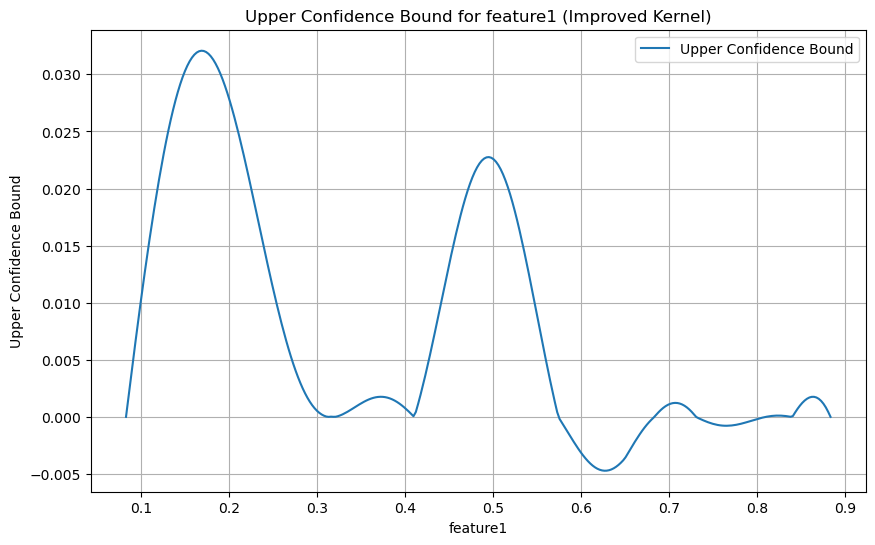

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


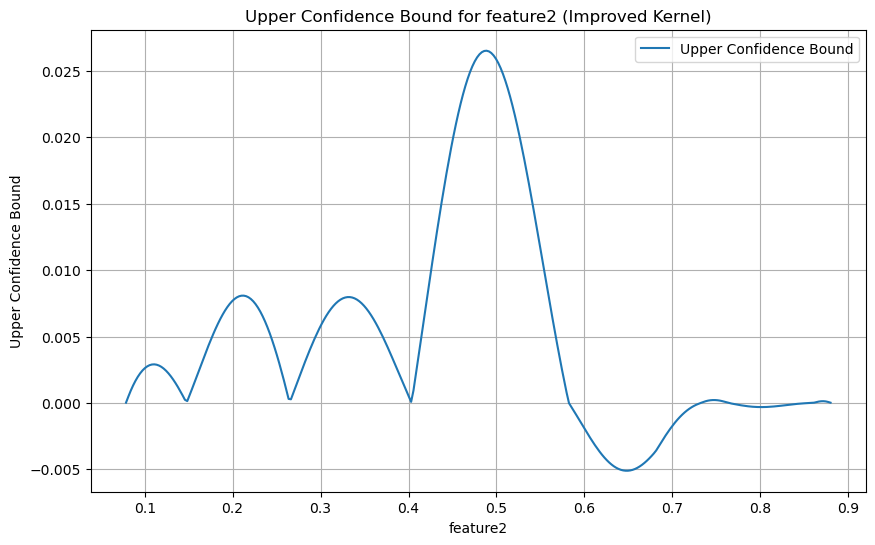

In [47]:
def expected_improvement(X, gpr, xi=0.01):
    mu, sigma = gpr.predict(X, return_std=True)
    mu_sample_opt = np.max(gpr.y_train_)
    with np.errstate(divide='ignore'):
        Z = (mu - mu_sample_opt - xi) / sigma
        ei = (mu - mu_sample_opt - xi) * norm.cdf(Z) + sigma * norm.pdf(Z)
        ei[sigma == 0.0] = 0.0
    return ei

# Calculate and plot Upper Confidence Bound (UCB) for each feature

for feature_name in ['feature1', 'feature2']:
    # Prepare the data for the Gaussian Process Regressor
    X = df[[feature_name]].values
    y = df['target'].values

    # Create and fit the Gaussian Process Regressor with an improved kernel
    kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=0.1, length_scale_bounds=(1e-2, 1e2))
    gpr = GaussianProcessRegressor(kernel=kernel, alpha=1e-10, n_restarts_optimizer=10, random_state=0)
    gpr.fit(X, y)

    # Generate points for prediction
    X_pred = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    
    # Predict mean and standard deviation
    mu, sigma = gpr.predict(X_pred, return_std=True)
    
    # Calculate UCB (you can adjust the kappa value)
    kappa = 2  # Exploration parameter (adjust as needed)
    ucb = mu + kappa * sigma

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(X_pred, ucb, label='Upper Confidence Bound')
    plt.xlabel(feature_name)
    plt.ylabel('Upper Confidence Bound')
    plt.title(f'Upper Confidence Bound for {feature_name} (Improved Kernel)')
    plt.legend()
    plt.grid(True)
    plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


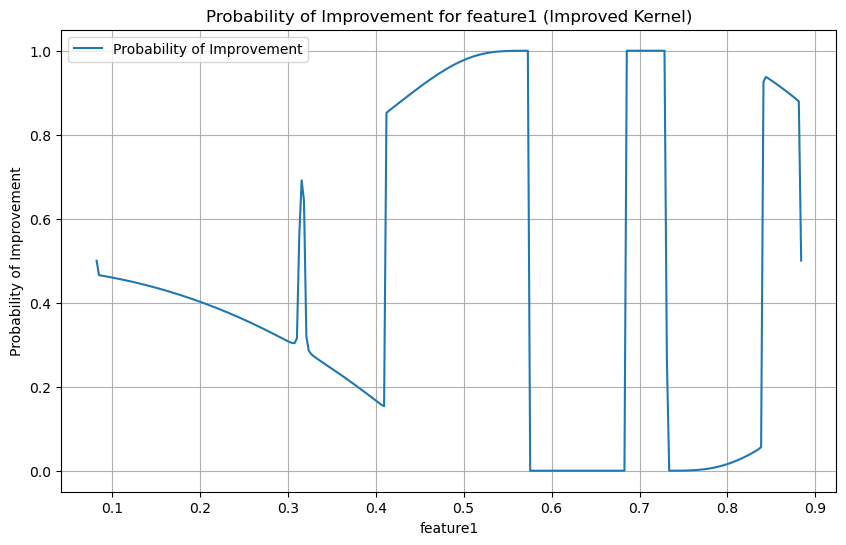

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


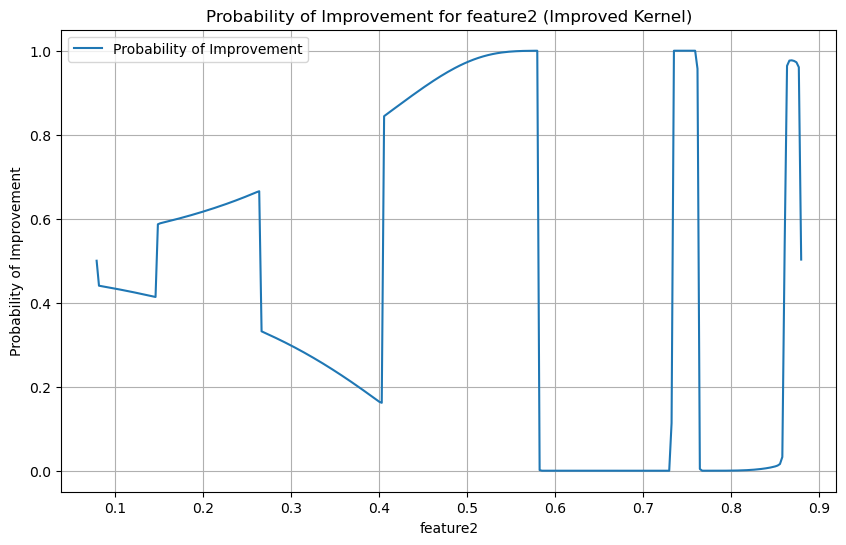

In [49]:
def expected_improvement(X, gpr, xi=0.01):
    mu, sigma = gpr.predict(X, return_std=True)
    mu_sample_opt = np.max(gpr.y_train_)
    with np.errstate(divide='ignore'):
        Z = (mu - mu_sample_opt - xi) / sigma
        ei = (mu - mu_sample_opt - xi) * norm.cdf(Z) + sigma * norm.pdf(Z)
        ei[sigma == 0.0] = 0.0
    return ei

# Calculate and plot Probability of Improvement (PI) for each feature

for feature_name in ['feature1', 'feature2']:
    # Prepare the data for the Gaussian Process Regressor
    X = df[[feature_name]].values
    y = df['target'].values

    # Create and fit the Gaussian Process Regressor with an improved kernel
    kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=0.1, length_scale_bounds=(1e-2, 1e2))
    gpr = GaussianProcessRegressor(kernel=kernel, alpha=1e-10, n_restarts_optimizer=10, random_state=0)
    gpr.fit(X, y)

    # Generate points for prediction
    X_pred = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    
    # Predict mean and standard deviation
    mu, sigma = gpr.predict(X_pred, return_std=True)
    
    # Calculate Probability of Improvement (PI)
    mu_sample_opt = np.max(gpr.y_train_)
    Z = (mu - mu_sample_opt) / sigma
    pi = norm.cdf(Z)  # Probability of improvement

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(X_pred, pi, label='Probability of Improvement')
    plt.xlabel(feature_name)
    plt.ylabel('Probability of Improvement')
    plt.title(f'Probability of Improvement for {feature_name} (Improved Kernel)')
    plt.legend()
    plt.grid(True)
    plt.show()

In [51]:
# Function to find the best new data point based on EI
def find_best_ei_point(gpr, feature_name, df):
    X = df[[feature_name]].values
    X_pred = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    ei = expected_improvement(X_pred, gpr)
    best_index = np.argmax(ei)
    best_ei_point = X_pred[best_index]
    best_ei = ei[best_index]
    return best_ei_point, best_ei

# Function to find the best new data point based on UCB
def find_best_ucb_point(gpr, feature_name, df):
    X = df[[feature_name]].values
    X_pred = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    mu, sigma = gpr.predict(X_pred, return_std=True)
    kappa = 2
    ucb = mu + kappa * sigma
    best_index = np.argmax(ucb)
    best_ucb_point = X_pred[best_index]
    best_ucb = ucb[best_index]
    return best_ucb_point, best_ucb

# Function to find the best new data point based on PI
def find_best_pi_point(gpr, feature_name, df):
    X = df[[feature_name]].values
    X_pred = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    mu, sigma = gpr.predict(X_pred, return_std=True)
    mu_sample_opt = np.max(gpr.y_train_)
    Z = (mu - mu_sample_opt) / sigma
    pi = norm.cdf(Z)
    best_index = np.argmax(pi)
    best_pi_point = X_pred[best_index]
    best_pi = pi[best_index]
    return best_pi_point, best_pi

# Example usage
for feature_name in ['feature1', 'feature2']:

    kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=0.1, length_scale_bounds=(1e-2, 1e2))
    gpr = GaussianProcessRegressor(kernel=kernel, alpha=1e-10, n_restarts_optimizer=10, random_state=0)
    X = df[[feature_name]].values
    y = df['target'].values
    gpr.fit(X, y)

    best_ei_point, best_ei = find_best_ei_point(gpr, feature_name, df)
    best_ucb_point, best_ucb = find_best_ucb_point(gpr, feature_name, df)
    best_pi_point, best_pi = find_best_pi_point(gpr, feature_name, df)

    print(f"For feature '{feature_name}':")
    print(f"  Best EI point: {best_ei_point[0]}, EI: {best_ei}")
    print(f"  Best UCB point: {best_ucb_point[0]}, UCB: {best_ucb}")
    print(f"  Best PI point: {best_pi_point[0]}, PI: {best_pi}")

For feature 'feature1':
  Best EI point: 0.4979396914013518, EI: 0.0029728216254927887
  Best UCB point: 0.16827394902453147, UCB: 0.03207002622925198
  Best PI point: 0.6855543415345016, PI: 1.0
For feature 'feature2':
  Best EI point: 0.494047780258646, EI: 0.004245305670470921
  Best UCB point: 0.4886887479707889, UCB: 0.026512290098874763
  Best PI point: 0.7405632655000738, PI: 0.9999999999789048


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


In [53]:
# Function to find the best new data point based on EI, UCB, and PI
def find_best_acquisition_point(gpr, feature_name, df, acquisition_function='ei'):
    X = df[[feature_name]].values
    X_pred = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    
    if acquisition_function == 'ei':
        acquisition_values = expected_improvement(X_pred, gpr)
    elif acquisition_function == 'ucb':
        mu, sigma = gpr.predict(X_pred, return_std=True)
        kappa = 2
        acquisition_values = mu + kappa * sigma
    elif acquisition_function == 'pi':
        mu, sigma = gpr.predict(X_pred, return_std=True)
        mu_sample_opt = np.max(gpr.y_train_)
        Z = (mu - mu_sample_opt) / sigma
        acquisition_values = norm.cdf(Z)
    else:
        raise ValueError("Invalid acquisition function.")
    
    best_index = np.argmax(acquisition_values)
    best_point = X_pred[best_index]
    best_value = acquisition_values[best_index]
    return best_point, best_value

# Create a new array to store the best values
best_feature_values = []

# Iterate through features and find best values using different acquisition functions
for feature_name in ['feature1', 'feature2']:
    kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=0.1, length_scale_bounds=(1e-2, 1e2))
    gpr = GaussianProcessRegressor(kernel=kernel, alpha=1e-10, n_restarts_optimizer=10, random_state=0)
    X = df[[feature_name]].values
    y = df['target'].values
    gpr.fit(X, y)
    
    #Find the best point using each acquisition function
    best_ei_point, _ = find_best_acquisition_point(gpr, feature_name, df, acquisition_function='ei')
    best_ucb_point, _ = find_best_acquisition_point(gpr, feature_name, df, acquisition_function='ucb')
    best_pi_point, _ = find_best_acquisition_point(gpr, feature_name, df, acquisition_function='pi')

    #Store the best value across methods, rounded to six significant figures
    best_value = np.round(np.max([best_ei_point, best_ucb_point, best_pi_point]),6)

    best_feature_values.append(best_value)
    
# Convert the list to a NumPy array
best_feature_values = np.array(best_feature_values)

best_feature_values

/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.001. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


array([0.685554, 0.740563])

In [55]:
best_feature_values = {}

for feature in ['feature1', 'feature2']:
    df_sorted = df.sort_values(feature)
    X = df_sorted[[feature]].values
    y = df_sorted['target'].values
    kernel = 1.0 * RBF(length_scale=1.0) + 1.0 * RBF(length_scale=0.1)
    gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.1, n_restarts_optimizer=20, normalize_y=True, random_state=0)
    gpr.fit(X, y)
    X_pred = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
    y_pred, sigma = gpr.predict(X_pred, return_std=True)
    
    # Use the prediction with the highest value (you can change the acquisition function if needed)
    best_index = np.argmax(y_pred)
    best_feature_value = X_pred[best_index][0]
    best_feature_values[feature] = best_feature_value

# Create a new data array with the best values
new_data_array = np.array(list(best_feature_values.values()))

# Display the results formatted to six significant figures
print("Single Best Values for Each Feature (6 significant figures):")
for feature, value in best_feature_values.items():
    print(f"{feature}: {value:.6f}")

print("\nNew Data Array:")
new_data_array

Single Best Values for Each Feature (6 significant figures):
feature1: 0.689567
feature2: 0.746636

New Data Array:


/opt/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


array([0.6895666 , 0.74663648])

In [57]:
# 5. (Optional) Add a small amount of noise to the new input data point
# to avoid overfitting to the specific grid point
new_input_data = new_data_array
noise_stddev = 0.01 # Adjust the noise level as needed
new_input_data += np.random.normal(0, noise_stddev, size=2)

print("New Input Data (with noise):", new_input_data)

New Input Data (with noise): [0.69768196 0.75307591]


In [59]:
print("New Input Data (with noise):", [round(x, 6) for x in new_input_data])

New Input Data (with noise): [0.697682, 0.753076]


In [227]:
inputs

array([[0.31940389, 0.76295937],
       [0.57432921, 0.8798981 ],
       [0.73102363, 0.73299988],
       [0.84035342, 0.26473161],
       [0.65011406, 0.68152635],
       [0.41043714, 0.1475543 ],
       [0.31269116, 0.07872278],
       [0.68341817, 0.86105746],
       [0.08250725, 0.40348751],
       [0.88388983, 0.58225397],
       [0.743553  , 0.12131   ]])

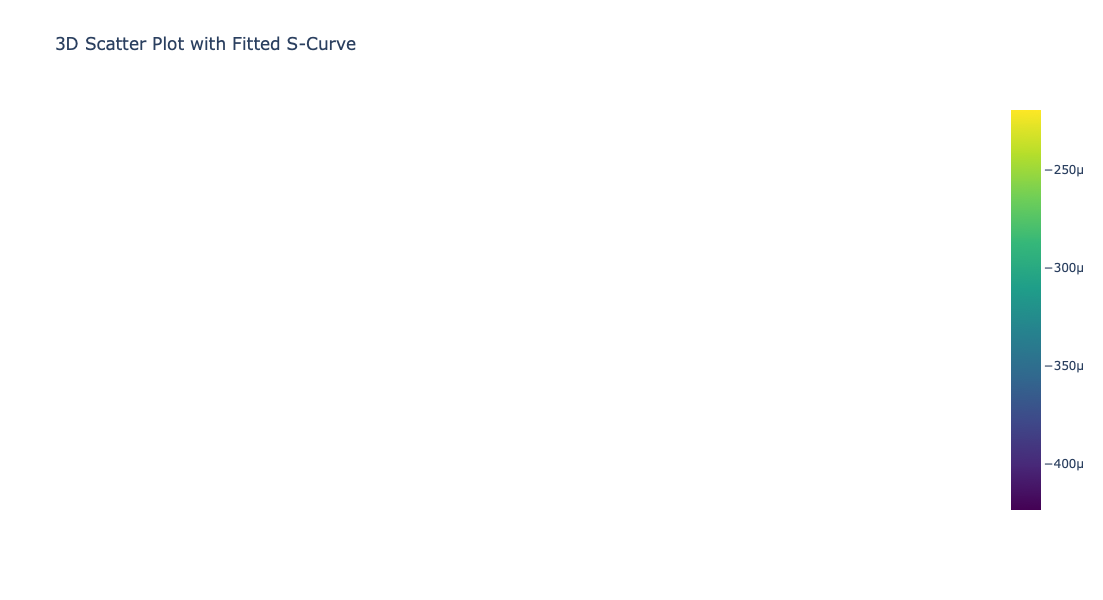

In [229]:
# prompt: Using dataframe df: 3d plot of df with fitting s curve function & allows rotation of output

import plotly.graph_objects as go
import numpy as np
from scipy.optimize import curve_fit

# Define the s-curve function
def s_curve(x, a, b, c):
    return c / (1 + np.exp(-a * (x - b)))

# Prepare data for fitting
x_data = df['feature1']  
y_data = df['feature2']
z_data = df['target']

# Fit the s-curve to the target variable
popt, _ = curve_fit(s_curve, x_data, z_data) # Fit s-curve to feature1 and target

# Generate surface points for the fitted s-curve
x_fit = np.linspace(x_data.min(), x_data.max(), 100)
y_fit = np.linspace(y_data.min(), y_data.max(), 100)
x_fit_grid, y_fit_grid = np.meshgrid(x_fit, y_fit)
z_fit_grid = s_curve(x_fit_grid, *popt)


# Create the 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(x=df['feature1'],
                                y=df['feature2'],
                                z=df['target'],
                                mode='markers',
                                marker=dict(size=5))])

# Add the fitted s-curve surface
fig.add_trace(go.Surface(x=x_fit_grid, y=y_fit_grid, z=z_fit_grid, opacity=0.7, colorscale='viridis', name='Fitted S-curve'))


# Customize the plot
fig.update_layout(scene=dict(xaxis_title='Feature 1', yaxis_title='Feature 2', zaxis_title='Target'),
                  title='3D Scatter Plot with Fitted S-Curve',
                  width=800, height=600)

# Enable rotation of the 3D plot
fig.update_layout(scene_aspectmode='cube') # Set aspect ratio to make it a cube


fig.show()

In [231]:
model.get_params

<bound method BaseEstimator.get_params of GaussianProcessRegressor(kernel=RBF(length_scale=0.1))>

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names



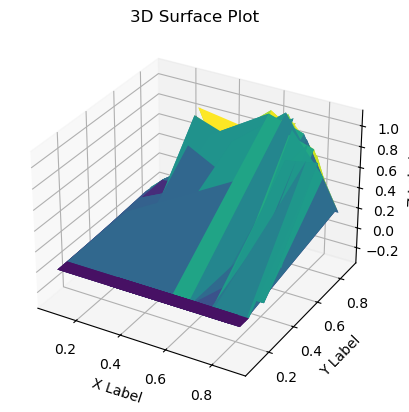

In [235]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Generate sample data
#x = np.arange(-5, 5, 0.25)
#y = np.arange(-5, 5, 0.25)
x = inputs[:,0]
y = inputs[:,1]
X, Y = np.meshgrid(x, y)
#Z = np.sin(np.sqrt(X**2 + Y**2))

# **Create a grid of input points for prediction:**
# This creates a 2D array of points from the grid defined by X and Y.
grid_points = np.c_[X.ravel(), Y.ravel()] 

# **Generate predictions for the grid points:**
Z = gp.predict(grid_points)

# Reshape Z to match the shape of X and Y
Z = Z.reshape(X.shape)

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='viridis')

# Customize the plot
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Surface Plot')

# Show the plot
plt.show()

In [239]:
inputs

array([[0.31940389, 0.76295937],
       [0.57432921, 0.8798981 ],
       [0.73102363, 0.73299988],
       [0.84035342, 0.26473161],
       [0.65011406, 0.68152635],
       [0.41043714, 0.1475543 ],
       [0.31269116, 0.07872278],
       [0.68341817, 0.86105746],
       [0.08250725, 0.40348751],
       [0.88388983, 0.58225397],
       [0.743553  , 0.12131   ]])

In [61]:
print("New Input Data (with noise):", [round(x, 6) for x in new_input_data])

New Input Data (with noise): [0.697682, 0.753076]
